In [14]:
!pip install kmodes


In [ ]:
!pip install geopandas

import geopandas as gpd # for handling geojson data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib inline


In [ ]:

import geopandas as gpd # for handling geojson data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib inline


In [6]:
data = gpd.read_file("bangalore.geojson")

In [7]:
data.head()

,id,@id,addr:district,addr:postcode,addr:state,amenity,building,emergency,name,name:kn,source,type,wikidata,addr:street,addr:housename,atm,brand:wikidata,brand:wikipedia,short_name,height,roof:colour,healthcare,addr:city,internet_access,name:ar,name:as,name:ast,name:ba,name:bn,name:de,name:en,name:es,name:fa,name:fi,name:fr,name:gu,name:hi,name:it,name:ja,name:ko,...,drive_through,fuel:1_50,microbrewery,source:name,food,user_defined,outdoor_seating,consulate,backrest,man_made,drinking_water,colour,material,seats,source:amenity,recycling:glass_bottles,bicycle_parking,covered,lit,natural,addr:landmark,place_of_worship,currency:INR,health_facility:type,building:material,diet,official_name,addr:subdistrict,display,support,visibility,collection_times,health_amenity:type,floor,waste,bar,layer,reservation,cash_in,geometry
0,relation/2025893,relation/2025893,Bengaluru Urban,560002,Karnataka,hospital,yes,yes,Vanivilas Women and Children Hospital,ವಾಣಿ ವಿಲಾಸ ಮಹಿಳೆ ಮತ್ತು ಮಕ್ಕಳ ಆಸ್ಪತ್ರೆ,OpenGovernmentData,multipolygon,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((77.57360 12.96170, 77.57356 12.96171..."
1,relation/2025895,relation/2025895,None,None,None,hospital,yes,yes,Minto Eye Hospital,ಮಿಂಟೋ ಕಣ್ಣಿನ ಆಸ್ಪತ್ರೆ,None,multipolygon,Q6869655,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((77.57196 12.96113, 77.57206 12.96100..."
2,relation/2025910,relation/2025910,None,None,None,college,yes,None,None,None,None,multipolygon,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((77.57591 12.96415, 77.57557 12.96346..."
3,relation/2032168,relation/2032168,None,None,None,school,school,None,Corporation School,ಕಾರ್ಪೊರೇಶನ್ ಶಾಲೆ,None,multipolygon,None,2nd Main Road,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((77.57972 12.97894, 77.57970 12.97863..."
4,relation/2107012,relation/2107012,None,None,None,college,yes,None,St. Joseph's PU College,ಸೆಂಟ್ ಜೋಸೆಫ್ಸ್ ಪದವಿ ಪೂರ್ವ ಕಾಲೇಜು,None,multipolygon,None,None,P-Block,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((77.60398 12.97141, 77.60409 12.97113..."


In [8]:
data['amenity'].unique()

array(['hospital', 'college', 'school', 'bank', 'courthouse',
       'university', 'marketplace', 'bus_station', 'parking', 'theatre',
       'club', 'library', 'place_of_worship', 'planetarium',
       'post_office', 'public_building', 'police', 'community_centre',
       'grave_yard', 'cinema', 'arts_centre', 'townhall', 'swimming_pool',
       'fuel', 'fast_food', 'fountain', 'fire_station', 'restaurant',
       'toilets', 'monastery', 'dentist', 'clinic', 'doctors',
       'nightclub', 'recycling', 'office', 'shop', 'embassy', 'taxi',
       'motorcycle_parking', 'shelter', 'cafe', 'veterinary',
       'food_court', 'bicycle_rental', 'social_facility', 'atm', 'pub',
       'parking_space', 'telephone', 'bar', 'drinking_water', 'post_box',
       'pharmacy', 'gymnasium', 'ice_cream', 'kindergarten',
       'coworking_space', 'bicycle_parking', 'vending_machine',
       'waste_basket', 'blood_bank', 'bench', 'nursing_home',
       'hunting_stand', 'money_transfer', 'car_sharing',
   

In [10]:
data['amenity'].value_counts()

restaurant          506
place_of_worship    420
bank                295
hospital            250
school              241
                   ... 
planetarium           1
waste_disposal        1
spa                   1
office                1
hunting_stand         1
Name: amenity, Length: 84, dtype: int64

In [11]:
dummy_var=pd.get_dummies(data['amenity'])

In [12]:
x = dummy_var.reset_index().values

In [15]:
from kmodes import kmodes
import random

In [16]:
km = kmodes.KModes(n_clusters=10, init='Cao', n_init=1, verbose=0,random_state=3425)
clusters = km.fit_predict(x)
dummy_var['clusters'] = clusters

In [17]:
kmodes = km.cluster_centroids_
data_concat=pd.concat([data['amenity'],dummy_var],axis=1)
result_cluster = data_concat.groupby('clusters')

In [18]:


result_cluster['amenity'].unique()



clusters
0    [college, courthouse, university, marketplace,...
1                                   [place_of_worship]
2                                               [bank]
3                                           [hospital]
4                                             [school]
5                                                [atm]
6                                              [bench]
7                                          [fast_food]
8                                             [clinic]
9                                           [pharmacy]
Name: amenity, dtype: object

In [19]:
data_concat['geometry']=data['geometry']

In [28]:
result = data_concat[['amenity','clusters','geometry']]

In [ ]:
result['clusters'] = result['clusters'].replace(to_replace=[0,6],value='others')
result['clusters'] = result['clusters'].replace(to_replace=[1],value='')
result['clusters'] = result['clusters'].replace(to_replace=[2,5],value='banking')
result['clusters'] = result['clusters'].replace(to_replace=[4],value='education')
result['clusters'] = result['clusters'].replace(to_replace=[3,8,9],value='health')
result['clusters'] = result['clusters'].replace(to_replace=[7],value='food')

In [30]:
    result.head()
    

,amenity,clusters,geometry
0,hospital,health,"POLYGON ((77.57360 12.96170, 77.57356 12.96171..."
1,hospital,health,"POLYGON ((77.57196 12.96113, 77.57206 12.96100..."
2,college,others,"POLYGON ((77.57591 12.96415, 77.57557 12.96346..."
3,school,education,"POLYGON ((77.57972 12.97894, 77.57970 12.97863..."
4,college,others,"POLYGON ((77.60398 12.97141, 77.60409 12.97113..."


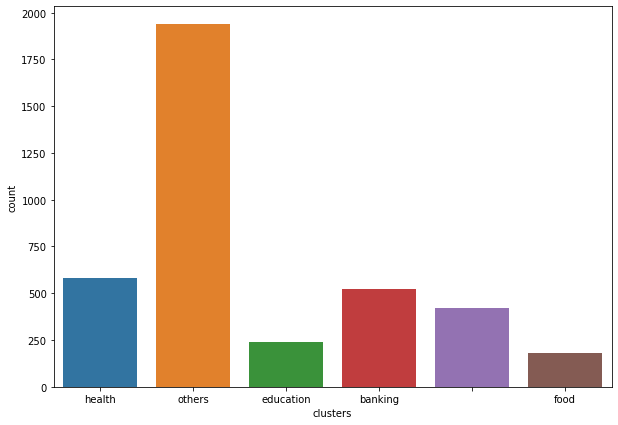

In [31]:
plt.subplots(1, figsize=(10,7))
sns.countplot(x='clusters',data=result)

In [32]:
result = gpd.GeoDataFrame(result, geometry='geometry')

In [33]:
df = gpd.GeoDataFrame(result)

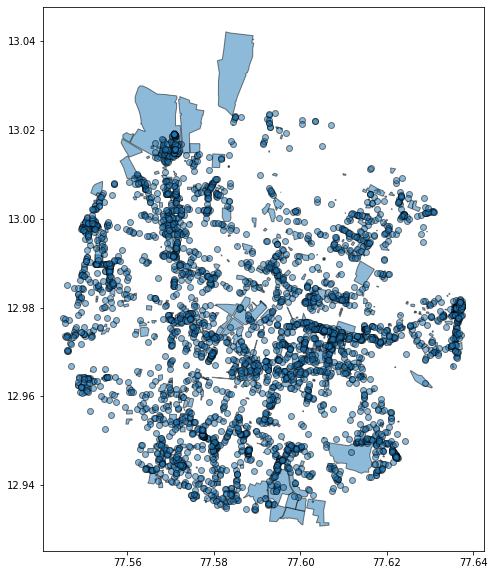

In [34]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [ ]:
import fiona
result.to_file('Bangalore_.shp', driver='ESRI Shapefile')